# Section 30 Part 3 - Linnear Discriminant Analysis
## Wine and Handwritten Digits Analysis

##### Lecture 182 The Main Ideas
##### Lecture 183 Data Preprocessing
##### Lecture 184 Data Visualisation
##### Lecture 185 Sample Splitting
##### Lecture 186 LDA Model Training
##### Lecture 187 Performance Evaluation
##### Lecture 188 Real World Application:  Hand Written Digits Recognition

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine

#### 183 Data Preprocessing

##### Example 1:  Clasification of Wines
##### 178 samples of wines tested and chemically analysed
##### 13 measurements per observation
##### 3 types of wine in total

#### Question:

##### Can you train the computer to classify wines correctly into 1 of three categories by looking at the chemical content?

##### Step 1 Load data and exploratory data analysis
###### Shape
###### Descriptive Statistics
###### Correlation

In [38]:
wine_X, wine_y = load_wine(return_X_y=True, as_frame=True)

In [39]:
wine_X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [40]:
wine_y.unique()

array([0, 1, 2])

In [41]:
wine_y

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int32

In [42]:
wine_y.describe()

count    178.000000
mean       0.938202
std        0.775035
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: target, dtype: float64

In [43]:
wine_X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [44]:
wine_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

###### Standardise the values as number of standard deviations away from the mean to iron out the differences between the scales of
###### the numeric data points accoss columns

In [45]:
wine_X_scaled = StandardScaler().fit_transform(wine_X)
wine_X_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [46]:
wine_X_scaled[:, 10].std()

1.0

In [47]:
wine_X_scaled[:, 10].mean()

1.9959065611238769e-16

###### Visualise the Data

In [48]:
# First make wine_X_scaled to DF

wine_X_scaled = pd.DataFrame(wine_X_scaled, columns=wine_X.columns)

In [51]:
wine_X_scaled.describe()
# Note that STD is now 1 all the way across

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,178.000000,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.382808e-16,-1.197544e-16,-8.370333e-16,-3.991813e-17,-3.991813e-17,0.000000,-3.991813e-16,3.592632e-16,-1.197544e-16,2.494883e-17,1.995907e-16,3.193450e-16,-1.596725e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-0.885468,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,0.095960,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,0.808997,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


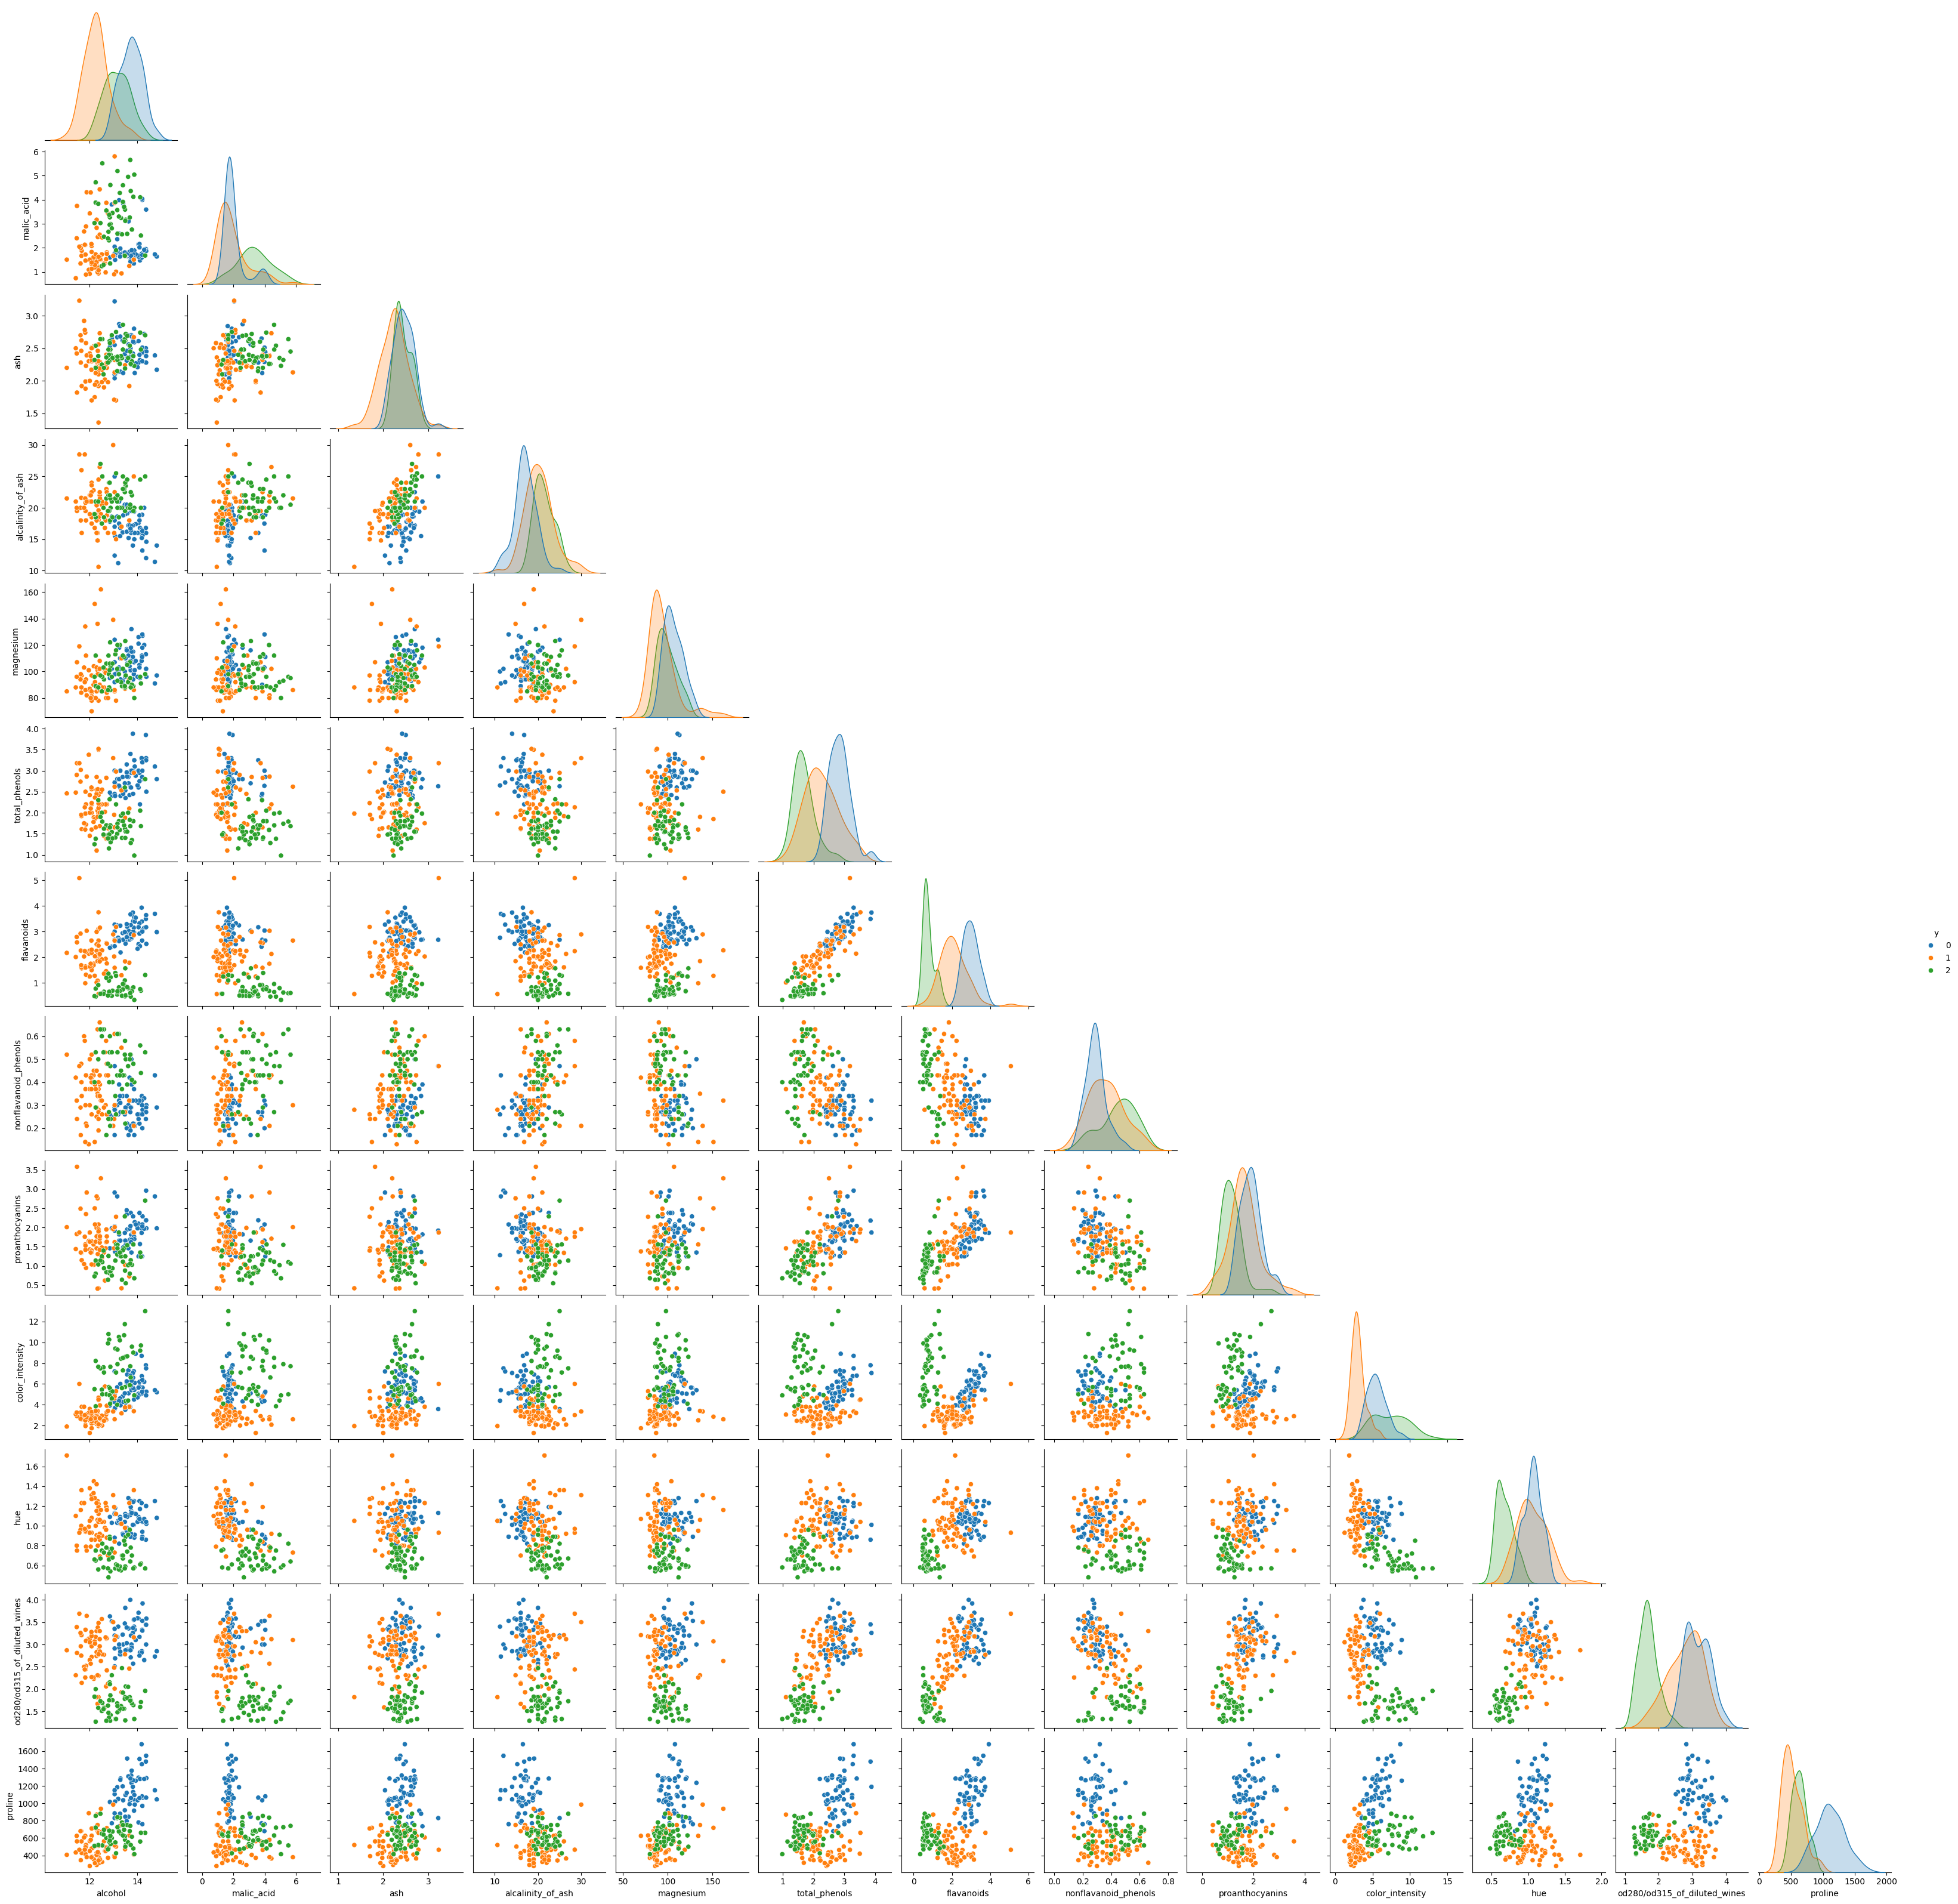

In [60]:
# Plot pairwise correlation
wine = wine_X.copy()
wine['y'] = wine_y
sns.pairplot(data=wine, hue='y', palette='tab10', corner=True).figure.savefig(r'output/PairPlot_Wine.png')

### Lecture 185

##### Step 2 Split Training and Test Samples.

In [61]:
wine_X_train, wine_X_test, wine_y_train, wine_y_test = train_test_split(wine_X_scaled, wine_y, test_size=0.2)

In [65]:
wine_X_train.shape

(142, 13)

In [66]:
wine_y_train.shape

(142,)

In [67]:
wine_X_test.shape

(36, 13)

In [68]:
(36*4)

144

In [69]:
wine_y_test.shape

(36,)

#### Lecture 186: Step 3 Fit Discriminate Analysis Model to Training Sample.
###### Fit Model
###### Transform X into new dimensions.
###### Plot X in new dimensions

In [71]:
lda_wine = LinearDiscriminantAnalysis()
lda_wine.fit(X=wine_X_train, y = wine_y_train)

LinearDiscriminantAnalysis()

In [74]:
# Colapse the 13 dimkensins down to 2
X_new = lda_wine.transform(wine_X_train)
X_new

array([[ 7.57332411e-01, -1.39114062e+00],
       [ 5.89646751e+00,  4.01407669e-01],
       [-3.72294496e+00,  9.60286543e-01],
       [ 5.47895273e+00,  1.95947343e+00],
       [-2.04507837e+00, -2.75254198e+00],
       [-3.24072061e+00,  2.77367727e+00],
       [-3.65889505e+00,  2.21995593e+00],
       [-1.68392551e+00,  1.31317646e+00],
       [-3.61341311e+00,  2.04886628e+00],
       [-5.15742580e-01, -3.15088740e+00],
       [ 4.41194589e+00,  2.55763613e-01],
       [ 2.07430517e+00, -6.02896557e-01],
       [ 3.67249216e+00,  8.42770071e-01],
       [ 4.16100442e+00,  7.09336060e-01],
       [-1.34030484e-03, -3.74992409e+00],
       [-5.26938191e+00,  3.61063288e+00],
       [ 6.10431316e+00,  2.79861676e+00],
       [-7.33284331e-01, -2.66638962e+00],
       [ 5.70645932e+00,  2.46598494e+00],
       [ 2.56941116e+00, -2.52506722e+00],
       [-5.81463053e-02, -2.73524413e+00],
       [-1.64755948e+00,  3.37858833e-01],
       [-3.52944826e+00,  2.97653915e-01],
       [ 5.

In [75]:
# And do the last 2 cells in one:

X_2 = lda_wine.fit_transform(X=wine_X_train, y=wine_y_train)

In [77]:
X_2

array([[ 7.57332411e-01, -1.39114062e+00],
       [ 5.89646751e+00,  4.01407669e-01],
       [-3.72294496e+00,  9.60286543e-01],
       [ 5.47895273e+00,  1.95947343e+00],
       [-2.04507837e+00, -2.75254198e+00],
       [-3.24072061e+00,  2.77367727e+00],
       [-3.65889505e+00,  2.21995593e+00],
       [-1.68392551e+00,  1.31317646e+00],
       [-3.61341311e+00,  2.04886628e+00],
       [-5.15742580e-01, -3.15088740e+00],
       [ 4.41194589e+00,  2.55763613e-01],
       [ 2.07430517e+00, -6.02896557e-01],
       [ 3.67249216e+00,  8.42770071e-01],
       [ 4.16100442e+00,  7.09336060e-01],
       [-1.34030484e-03, -3.74992409e+00],
       [-5.26938191e+00,  3.61063288e+00],
       [ 6.10431316e+00,  2.79861676e+00],
       [-7.33284331e-01, -2.66638962e+00],
       [ 5.70645932e+00,  2.46598494e+00],
       [ 2.56941116e+00, -2.52506722e+00],
       [-5.81463053e-02, -2.73524413e+00],
       [-1.64755948e+00,  3.37858833e-01],
       [-3.52944826e+00,  2.97653915e-01],
       [ 5.

In [78]:
X_2 == X_new

array([[ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ Tr

In [79]:
(X_2 != X_new).sum()

0

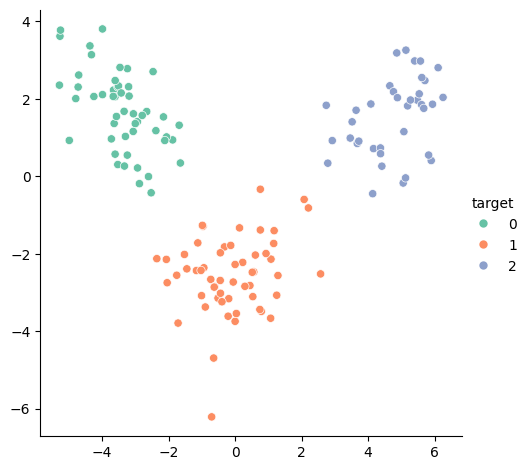

In [81]:
# Plot the transformed X data:


sns.relplot(x=X_new[:, 0], y=X_new[:, 1], hue = wine_y_train, palette='Set2').fig.savefig(r'output/new_xRelPlot.png')

In [83]:
# Classification of data:
# Each digit represents wine type.

lda_wine.predict(wine_X_train)

array([1, 2, 0, 2, 1, 0, 0, 0, 0, 1, 2, 1, 2, 2, 1, 0, 2, 1, 2, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       2, 2, 1, 2, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 2, 2, 2, 1, 0, 1, 0, 1, 2, 0, 1, 1, 1, 0, 2, 0, 2, 1, 1,
       0, 1, 2, 0, 0, 2, 2, 0, 1, 2, 1, 0, 1, 0, 2, 1, 0, 2, 1, 2, 2, 0,
       0, 0, 1, 1, 2, 1, 2, 0, 0, 1, 1, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       1, 1, 1, 0, 0, 0, 2, 0, 2, 1])

#### Lecture 187 Performance Evaluation:
##### Out Sample Score
##### Out Sample Confusion Matrix (2 ways)

In [86]:
predictions_wine = lda_wine.predict(X = wine_X_test)

In [87]:
# Compare predictions with real data.  Firstly combine into 1 dataset:

out_sample_result = pd.DataFrame(
    {
        'Actual_Classificatoin': wine_y_test,
        'Preiction': predictions_wine
    }
)

out_sample_result

,Actual_Classificatoin,Preiction
157,2,2
103,1,1
121,1,1
82,1,1
171,2,2
108,1,1
164,2,2
170,2,2
15,0,0
43,0,0


In [88]:
lda_wine.score(X=wine_X_test, y=wine_y_test)

1.0

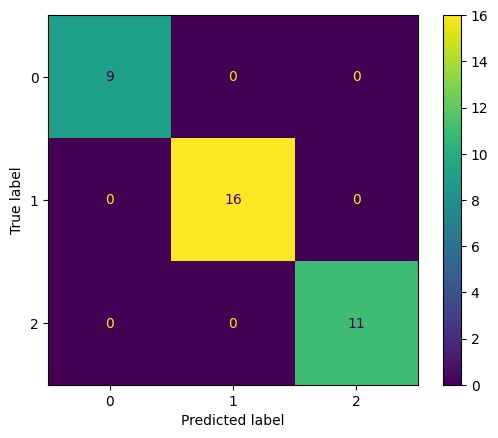

In [90]:
metrics.ConfusionMatrixDisplay.from_estimator(lda_wine, X=wine_X_test, y=wine_y_test).figure_.savefig(r'WineConfusionMatrix.png')

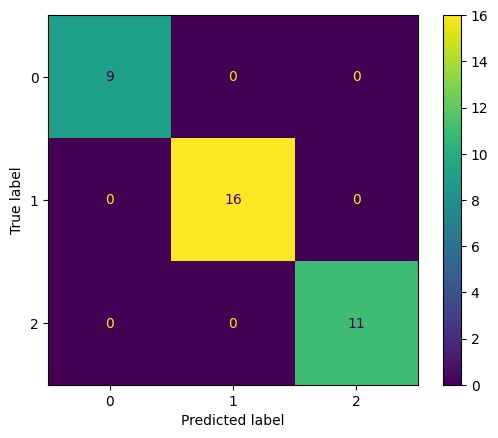

In [91]:
# A second way to do confusion matrix:

metrics.ConfusionMatrixDisplay.from_predictions(y_true=wine_y_test, y_pred=predictions_wine).figure_.savefig(r'WineConfusionMatrix2ndway.png')